# Predicting the rank of the Premiere League

Every year, the Premiere League is the most watched league in the world, and one of the most unpredictibable. Our main objectives here is trying to manipulate the Premiere League records, in order to build a model to predict the rank of a team, based on match data like goals, or corners...
http://www.football-data.co.uk/englandm.php

## Datasets

The website football-data.co.uk is a very complete website, with a lot of data : http://www.football-data.co.uk/englandm.php

In later parts, I will use other datasets, but you can find other datasets on the site (or on the Internet)    

## Steps

The process is quite simple, the purpose here is just to manipulate pandas dataframe, and regression using skitlearn.
* First, we will discover the datasets, trying to get the infos we need for the notebook
* We will prepare the data for the regression, dealing the NaN values
* We will train our model, predict the 2017-2018 ranking, and analyse our results
* Finally, we will try our model on other datasets

## Abreviations

In this notebook, we will use some abreviations to refer to some key features in a football games. Here are the most important ones :

* FTHG and HG = Full Time Home Team Goals
* FTAG and AG = Full Time Away Team Goals
* FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
* HTHG = Half Time Home Team Goals
* HTAG = Half Time Away Team Goals
* HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Other features could be important. Here are the list :

* Referee = Match Referee
* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target
* AST = Away Team Shots on Target
* HHW = Home Team Hit Woodwork
* AHW = Away Team Hit Woodwork
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed
* AF = Away Team Fouls Committed
* HFKC = Home Team Free Kicks Conceded
* AFKC = Away Team Free Kicks Conceded
* HO = Home Team Offsides
* AO = Away Team Offsides
* 0HY = Home Team Yellow Cards
* AY = Away Team Yellow Cards
* HR = Home Team Red Cards
* AR = Away Team Red Cards
* HBP = Home Team Bookings Points (10 = yellow, 25 = red)
* ABP = Away Team Bookings Points (10 = yellow, 25 = red)

The datasets also contain odds : we won't use them

In [57]:
"""import findspark
findspark.init('C:\\Users\\Sofiane\\Desktop\\spark\\spark-2.3.0-bin-hadoop2.7')

from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row


sc = SparkContext()

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time

sqlContext = SQLContext(sc)"""

"import findspark\nfindspark.init('C:\\Users\\Sofiane\\Desktop\\spark\\spark-2.3.0-bin-hadoop2.7')\n\nfrom pyspark import SparkContext\nfrom pyspark.sql import SQLContext\nfrom pyspark.sql import Row\n\n\nsc = SparkContext()\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\nfrom time import time\n\nsqlContext = SQLContext(sc)"

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time

## Part I : Understanding the data

<div class="alert alert-info">

First, let's load our datasets from our data folder

</div>

In [59]:
import pandas as pd

base_folder = "data/"

uk_1718 = pd.read_csv(base_folder + 'uk_2017_2018.csv')
uk_1617 = pd.read_csv(base_folder + 'uk_2016_2017.csv')
uk_1516 = pd.read_csv(base_folder + 'uk_2015_2016.csv')
uk_1415 = pd.read_csv(base_folder + 'uk_2014_2015.csv')
uk_1314 = pd.read_csv(base_folder + 'uk_2013_2014.csv')
uk_1213 = pd.read_csv(base_folder + 'uk_2012_2013.csv')

<div class="alert alert-info">

We can print the columns of one the DataFrames, to see the features

</div>

In [60]:
uk_1516.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

<div class="alert alert-info">

Now, we will try to manipulate the data : we have all the matches of all teams in the Premier League, but we don't have (yet) the ranking of every season. Let's pick a team, and try to display infos, like the number of points in a season, number of win, loss, etc..

</div>

In [61]:
uk_1617[(uk_1617.HomeTeam =='Arsenal') | (uk_1617.AwayTeam =='Arsenal')]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
7,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,1.99,31,-0.50,2.41,2.31,1.81,1.64,2.80,3.44,2.68
12,E0,20/08/16,Leicester,Arsenal,0,0,D,0,0,D,...,2.16,32,0.25,1.83,1.78,2.15,2.10,2.82,3.50,2.63
27,E0,27/08/16,Watford,Arsenal,1,3,A,0,3,A,...,1.87,33,1.00,1.72,1.67,2.34,2.24,6.00,4.16,1.63
30,E0,10/09/16,Arsenal,Southampton,2,1,H,1,1,D,...,2.02,36,-1.00,2.00,1.95,1.96,1.90,1.63,4.17,6.05
42,E0,17/09/16,Hull,Arsenal,1,4,A,0,1,A,...,1.92,36,1.00,1.89,1.85,2.07,2.00,6.12,4.19,1.62
50,E0,24/09/16,Arsenal,Chelsea,3,0,H,3,0,H,...,2.06,30,-0.25,2.05,2.00,1.92,1.86,2.48,3.49,3.02
66,E0,02/10/16,Burnley,Arsenal,0,1,A,0,0,D,...,2.13,34,1.50,1.83,1.79,2.16,2.06,9.50,5.38,1.37
70,E0,15/10/16,Arsenal,Swansea,3,2,H,2,1,H,...,2.56,28,-2.00,2.38,2.28,1.69,1.65,1.24,7.00,14.50
80,E0,22/10/16,Arsenal,Middlesbrough,0,0,D,0,0,D,...,2.25,33,-2.00,2.44,2.30,1.68,1.64,1.27,6.30,13.00
93,E0,29/10/16,Sunderland,Arsenal,1,4,A,0,1,A,...,2.33,37,1.00,2.47,2.35,1.66,1.61,8.14,4.87,1.44


In [62]:
Victories = uk_1617[(uk_1617.HomeTeam =='Arsenal') & (uk_1617.FTR=='H')].count()[0]
print('Arsenal won ',Victories," at home")


# A win is 3 points, a draw 1 points and a loss 0 points
NumberOfPoints = uk_1617[((uk_1617.HomeTeam =='Arsenal') & (uk_1617.FTR=='H')) | 
                    ((uk_1617.AwayTeam =='Arsenal') & (uk_1617.FTR=='A'))].count()[0]*3 \
                + uk_1617[((uk_1617.HomeTeam =='Arsenal') & (uk_1617.FTR=='D')) | 
                    ((uk_1617.AwayTeam =='Arsenal') & (uk_1617.FTR=='D'))].count()[0]

#We need to compute the difference between the goals scored by the team and the goals scored against the team

diff=(uk_1617[uk_1617.HomeTeam =='Arsenal'].FTHG - uk_1617[uk_1617.HomeTeam =='Arsenal'].FTAG).sum()\
        +(uk_1617[uk_1617.AwayTeam =='Arsenal'].FTAG - uk_1617[uk_1617.AwayTeam =='Arsenal'].FTHG).sum()


print('The difference of Arsenal is ', diff)
print('The total number of Points of Arsenal is ',NumberOfPoints)

Arsenal won  14  at home
The difference of Arsenal is  33
The total number of Points of Arsenal is  75


<div class="alert alert-info">

We have the tools to build the ranking of a season ! We write a function, given a list of teams and a datasets, will rank the teams

</div>

In [63]:
def rankingLeague(listTeams, data):
    """ Rank the teams, by their number of points, then by their goal average"""
    teamsPoints = []
    
    for team in listTeams:
        NumberOfPoints = data[((data.HomeTeam ==team) & (data.FTR=='H')) | 
                    ((data.AwayTeam ==team) & (data.FTR=='A'))].count()[0]*3 \
                + data[((uk_1617.HomeTeam ==team) & (data.FTR=='D')) | 
                    ((data.AwayTeam ==team) & (data.FTR=='D'))].count()[0]
            
        diff=(data[data.HomeTeam ==team].FTHG - data[data.HomeTeam ==team].FTAG).sum()\
            +(data[data.AwayTeam ==team].FTAG - data[data.AwayTeam ==team].FTHG).sum()
        
        teamsPoints.append((team, NumberOfPoints, diff))
        
    rank = sorted(teamsPoints, key=lambda x: (-x[1], -x[2])) #We sort
    return rank


listTeams1617 = uk_1617.HomeTeam.unique()
rank1617 = rankingLeague(listTeams1617, uk_1617)
rankTeam1617 = [rank1617[i][0] for i in range(len(rank1617))]

display(rankTeam1617)

['Chelsea',
 'Tottenham',
 'Man City',
 'Liverpool',
 'Arsenal',
 'Man United',
 'Everton',
 'Southampton',
 'Bournemouth',
 'West Brom',
 'West Ham',
 'Leicester',
 'Stoke',
 'Crystal Palace',
 'Swansea',
 'Burnley',
 'Watford',
 'Hull',
 'Middlesbrough',
 'Sunderland']

<div class="alert alert-info">

We begin to see some hints for our objective : The goal average is a very important parameter to understand how well teams perform in a season.

We will plot the goal average for each rank, in the 2016-2017 season and in the 2015-2016 season.
</div>

In [64]:
listTeams1516 = uk_1516.HomeTeam.unique()
rank1516 = rankingLeague(listTeams1516, uk_1516)
rankTeam1516 = [rank1516[i][0] for i in range(len(rank1516))]

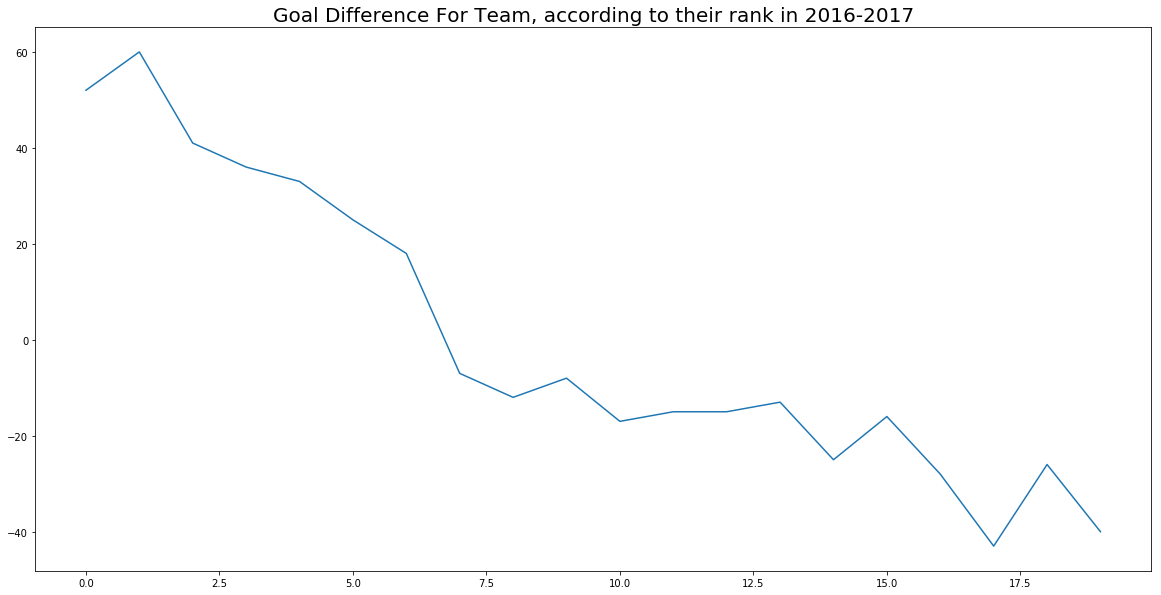

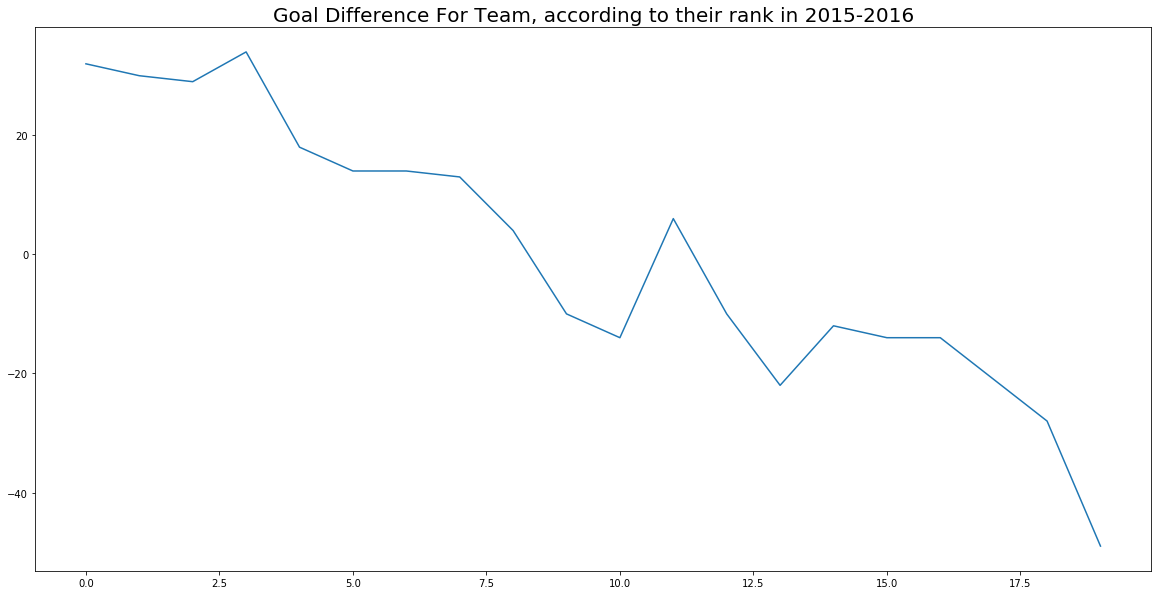

In [65]:
plt.figure(figsize=(20,10))
plt.title('Goal Difference For Team, according to their rank in 2016-2017', fontsize=20)
plt.plot([v[2] for v in rank1617])

plt.figure(figsize=(20,10))
plt.title('Goal Difference For Team, according to their rank in 2015-2016', fontsize=20)
plt.plot([v[2] for v in rank1516])

<div class="alert alert-block alert-success">

As we can see, it is pretty obvious that a high goal average is linked to a high rank. However, it is not a perfectly relationship !

</div>

## Part II : Preparing the data

<div class="alert alert-info">

Now, we will build a function called dataAllTeams : it is a function that will compute the mean for every features on a season for each team. We only keep the main features, so we will remove the odds indexes.

We will also convert in the Full Time Result and the Half Time Results columns the H/A/D system (Home won, Away won or a Draw) with the point system 

</div>

<div class="alert alert-warning">

Be careful if the team played at home or not : Indeed, if we want the number of goals scored by a team in a match, we will look at FTHG (Full Time Home Goals) if the team played at home, and at FTAG (Full Time Away Goals) otherwise. So we will have to deal this Home / Away problem in our function
</div>

In [66]:
def dataAllTeams(teamsList, data):
    """ Returns the mean of every feqtures for each teams in a season"""
    teamsAvg=[]
    rank=1
    resultTotal=[]
    
    for team in teamsList:
        
        # We start with the case where the team played at home
        teamHome = data[data.HomeTeam ==team].dropna()
        
        # Conversion in the point system
        teamHome['FTR'] = teamHome['FTR'].map({'H': 3, 'D': 1, 'A':0})
        teamHome['HTR'] = teamHome['HTR'].map({'H': 3, 'D': 1, 'A':0})
        
        # Compute the mean
        teamHome.loc["MEAN"]=teamHome.mean(axis=0)
        
        # We don't need the A columns and the odds, so :
        for col in data.columns:
            if (col not in ["FTHG", "FTAG", "FTR","HTHG","HTR","HS","HST","HY","HF","HC","HR"]):
                del teamHome[col]
        
        # We rename the columns :
        teamHome.rename(columns={'FTAG': 'Against','FTHG': 'Scored', 'HTHG': 'HTG', 'HS': 'S',\
                       'HST': 'ST','HF': 'F','HC': 'C','HY': 'Y','HR': 'R'}, inplace=True)
        
        # We do exactly the same thing in the other case
        
        teamAway = data[data.AwayTeam ==team].dropna()
        teamAway['FTR'] = teamAway['FTR'].map({'H': 3, 'D': 1, 'A':0})
        teamAway['HTR'] = teamAway['HTR'].map({'H': 3, 'D': 1, 'A':0})
        teamAway.loc["MEAN"]=teamAway.mean(axis=0)
        
        for col in data.columns:
            if (col not in ["FTAG", "FTHG", "FTR","HTAG","HTR","AS","AST","AY","AF","AC","AR"]):
                del teamAway[col]
        
        # Be careful when renaming the columns
        teamAway.rename(columns={'FTAG': 'Scored','FTHG': 'Against', 'HTAG': 'HTG', 'AS': 'S',\
                       'AST': 'ST','AF': 'F','AC': 'C','AY': 'Y','AR': 'R'}, inplace=True)
        
        # Compute the mean for away and home
        result=pd.concat([teamHome, teamAway]) 
        result=result[result.index == 'MEAN']
        result.rename(columns={'HomeTeam': 'TeamName'}, inplace=True)
        
        result.loc[""]=result.mean(axis=0)
        result=result[result.index == '']
        
        result['TeamName'] = team
        result["Rank"] = rank
        
        resultTotal.append(result)
        rank=rank+1
    
    return pd.concat(resultTotal)

teamsAvg1617 = dataAllTeams(rankTeam1617, uk_1617)

In [67]:
teamsAvg1617

,Against,C,F,FTR,HTG,HTR,R,S,ST,Scored,Y,TeamName,Rank
,0.868421,5.736842,10.368421,1.657895,0.973684,1.552632,0.000000,15.263158,5.368421,2.236842,1.894737,Chelsea,1
,0.684211,7.184211,11.368421,1.868421,0.947368,1.710526,0.000000,17.605263,6.763158,2.263158,1.631579,Tottenham,2
,1.026316,7.368421,10.394737,1.500000,0.947368,1.605263,0.105263,16.657895,5.710526,2.105263,1.868421,Man City,3
,1.105263,6.552632,10.447368,1.526316,1.026316,1.500000,0.000000,16.789474,6.210526,2.052632,1.421053,Liverpool,4
,1.157895,5.973684,10.447368,1.815789,0.710526,1.263158,0.078947,14.868421,5.263158,2.026316,1.763158,Arsenal,5
,0.763158,5.710526,13.078947,1.342105,0.736842,1.315789,0.052632,15.500000,5.526316,1.421053,2.000000,Man United,6
,1.157895,5.157895,12.078947,2.000000,0.605263,1.815789,0.052632,13.105263,5.052632,1.631579,1.868421,Everton,7
,1.263158,5.263158,11.157895,1.447368,0.500000,1.105263,0.052632,14.421053,4.710526,1.078947,1.526316,Southampton,8
,1.763158,5.026316,9.631579,1.763158,0.710526,1.447368,0.078947,11.736842,4.210526,1.447368,1.342105,Bournemouth,9
,1.342105,4.157895,11.815789,1.657895,0.552632,1.315789,0.000000,10.526316,3.236842,1.131579,2.105263,West Brom,10


<div class="alert alert-info">

Our data is ready : We have our features, and the rank, we just need to find the relationship between the features.
</div>

## Part 3 : Building our model

In [68]:
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

<div class="alert alert-info">

We will the the sklearn librabries, which seem to be adapted to our problem. We will use the Ridge() and the Lasso() regressions. But first, let's concatenate our DataFrames, to have a complete data to train

</div>

In [69]:
listTeams1718 = uk_1718.HomeTeam.unique()
rank1718 = rankingLeague(listTeams1718, uk_1718)
rankTeam1718 = [rank1718[i][0] for i in range(len(rank1718))]

listTeams1516 = uk_1516.HomeTeam.unique()
rank1516 = rankingLeague(listTeams1516, uk_1516)
rankTeam1516 = [rank1516[i][0] for i in range(len(rank1516))]

listTeams1415 = uk_1415.HomeTeam.unique()
rank1415 = rankingLeague(listTeams1415, uk_1415)
rankTeam1415 = [rank1415[i][0] for i in range(len(rank1617))]

listTeams1314 = uk_1314.HomeTeam.unique()
rank1314 = rankingLeague(listTeams1314, uk_1314)
rankTeam1314 = [rank1314[i][0] for i in range(len(rank1617))]

listTeams1213 = uk_1213.HomeTeam.unique()
rank1213 = rankingLeague(listTeams1213, uk_1213)
rankTeam1213 = [rank1213[i][0] for i in range(len(rank1617))]

C:\Users\Sofiane\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [70]:
teamsAvg1718 = dataAllTeams(rankTeam1718, uk_1718)

teamsAvg1617 = dataAllTeams(rankTeam1617, uk_1617)
teamsAvg1516 = dataAllTeams(rankTeam1516, uk_1516)
teamsAvg1415 = dataAllTeams(rankTeam1415, uk_1415)
teamsAvg1314 = dataAllTeams(rankTeam1314, uk_1314)
teamsAvg1213 = dataAllTeams(rankTeam1213, uk_1213)

# The teamAvg DataFrame will be our training set
teamAvg = pd.concat([teamsAvg1617, teamsAvg1516, teamsAvg1415, teamsAvg1314, teamsAvg1213])

### The Ridge Regression

<div class="alert alert-info">

In a Ridge Regression, there is a alpha parameter.

The skitlearn have a cross validation package, which split our dataset, to have a training set and a test set. We will use this package to choose alpha.

</div>

In [71]:
y = teamAvg["Rank"]
teamAvgModel = teamAvg.drop(['Rank', 'TeamName'], axis=1)
X_train, X_test , y_train, y_test = cross_validation.train_test_split(teamAvgModel, y, test_size=0.5, random_state=1)


# Fit a ridge regression on the training data
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)

ridgeOptimizeAlpha = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridgeOptimizeAlpha.fit(X_train, y_train)

predOptim = ridgeOptimizeAlpha.predict(X_test)

# Calculate the test MSE
print("The mean square error is ", mean_squared_error(y_test, predOptim))


The mean square error is  15.308593859659304


<div class="alert alert-success">

Our mean square error seems pretty good.

</div>

## Part 4 : Testing our model on the 2017 - 2018 season

<div class="alert alert-info">

We have the data of the 2017-2018 Premiere League season. We will train our model, then predict the ranking based on the features
</div>

In [72]:
y = teamAvg.Rank
teamAvgModel = teamAvg.drop(['Rank', 'TeamName'], axis=1)
teamsAvg1718Model = teamsAvg1718.drop(['Rank', 'TeamName'], axis=1)

ridge2 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge2.fit(teamAvgModel, y)
    
#We make our prediction the 2017-2018 season
pred = ridge2.predict(teamsAvg1718Model)

teamRankPrediction = pd.DataFrame()
teamRankPrediction["Team Name"] = [rankTeam1718[i] for i in range(len(pred))]
teamRankPrediction["Predicted"] = [pred[i] for i in range(len(pred))]

In [73]:
teamsAvg1718.rename(columns={'Rank': 'Actual'}, inplace=True)
actual = teamsAvg1718.iloc[:,-1:]
actual.index = list(range(len(actual)))

comparisionRealPredicted = pd.concat((teamRankPrediction, actual), axis=1)

In [74]:
comparisionRealPredicted

,Team Name,Predicted,Actual
0,Man City,-2.586891,1
1,Man United,4.581577,2
2,Liverpool,2.224873,3
3,Tottenham,2.682949,4
4,Chelsea,4.371657,5
5,Arsenal,6.404042,6
6,Burnley,12.586893,7
7,Everton,14.773494,8
8,Leicester,11.767908,9
9,Newcastle,12.421308,10


<div class="alert alert-success">

As we can see, we have a pretty good model prediction : If you compare the actual ranking to ur model, it fits pretty well : Manchester City clearly dominated the league for instance, and our model predicted a rank close to 0.

The bottom of the league is very tight : the 5 latest rank predicted seemed to be around 15, meaning that the bottom team have similar stats, and the fight for remaining in the Premier League should be tough.

However, we can see something weird : If our model was correct, Manchester United should be lower on the ranking. We should check the stats of Manchester United, comparing with Tottenham for instance

</div>


In [75]:
teamsAvg1718[teamsAvg1718.TeamName=='Man United']

,Against,C,F,FTR,HTG,HTR,R,S,ST,Scored,Y,TeamName,Actual
,0.764706,5.676471,10.911765,1.647059,0.794118,1.5,0.029412,13.441176,4.941176,1.911765,1.735294,Man United,2


In [76]:
teamsAvg1718[teamsAvg1718.TeamName=='Tottenham']

,Against,C,F,FTR,HTG,HTR,R,S,ST,Scored,Y,TeamName,Actual
,0.902778,6.642361,10.010417,1.506944,0.736111,1.427083,0.055556,16.815972,5.805556,1.944444,1.277778,Tottenham,4


<div class="alert alert-success">

We can compared to features values for those 2 teams, and try to explain why Man United should be lower : We can see that Man United shot less than Tottenham (S feature), less on targets (ST features), have more Yellow card per match.

But in fact, we can deduce a clear lack of efficiency from Tottenham ; although they tried to shot more, Man United is more realistic (higher average point per match). Man United also have a better defence, for an equivalent attack compared to Tottenham.

</div>

<div class="alert alert-info">

We have the FTR and HTR who tell us if the team won ; what we removed this information ? Are we still able to predict the ranking, also by the shot / corners / fouls ?

</div>

In [77]:
y = teamAvg.Rank
teamAvgModelWithoutR = teamAvg.drop(['Rank', 'TeamName', 'FTR', 'HTR'], axis=1)
teamsAvg1718Model = teamsAvg1718.drop(['Actual', 'TeamName', 'FTR', 'HTR'], axis=1)

ridgeWithout = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridgeWithout.fit(teamAvgModelWithoutR, y)
    
#We make our prediction the 2017-2018 season
predWithout = ridgeWithout.predict(teamsAvg1718Model)

teamRankPrediction = pd.DataFrame()
teamRankPrediction["Team Name"] = [rankTeam1718[i] for i in range(len(pred))]
teamRankPrediction["Predicted"] = [predWithout[i] for i in range(len(pred))]
comparisionRealPredictedWithout = pd.concat((teamRankPrediction, actual), axis=1)


In [78]:
comparisionRealPredictedWithout

,Team Name,Predicted,Actual
0,Man City,-2.503241,1
1,Man United,4.565100,2
2,Liverpool,2.079752,3
3,Tottenham,2.710943,4
4,Chelsea,4.453920,5
5,Arsenal,6.380078,6
6,Burnley,12.860469,7
7,Everton,14.785953,8
8,Leicester,11.996777,9
9,Newcastle,12.493518,10


<div class="alert alert-success">

The results are good : Man United even improved its score.

We plot the mean square error, to see if this is a good idea

</div>

201.73006679832167
The global mean square error including FTR and HTR is  10.086503339916083
The global mean square error withtout FTR and HTR is  10.348643615811843


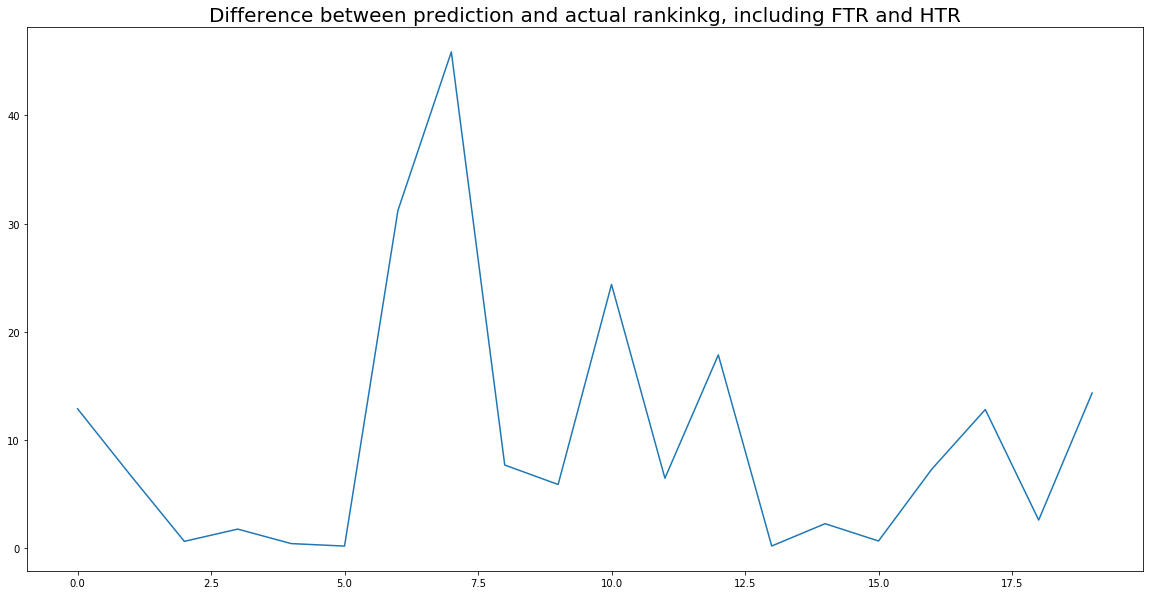

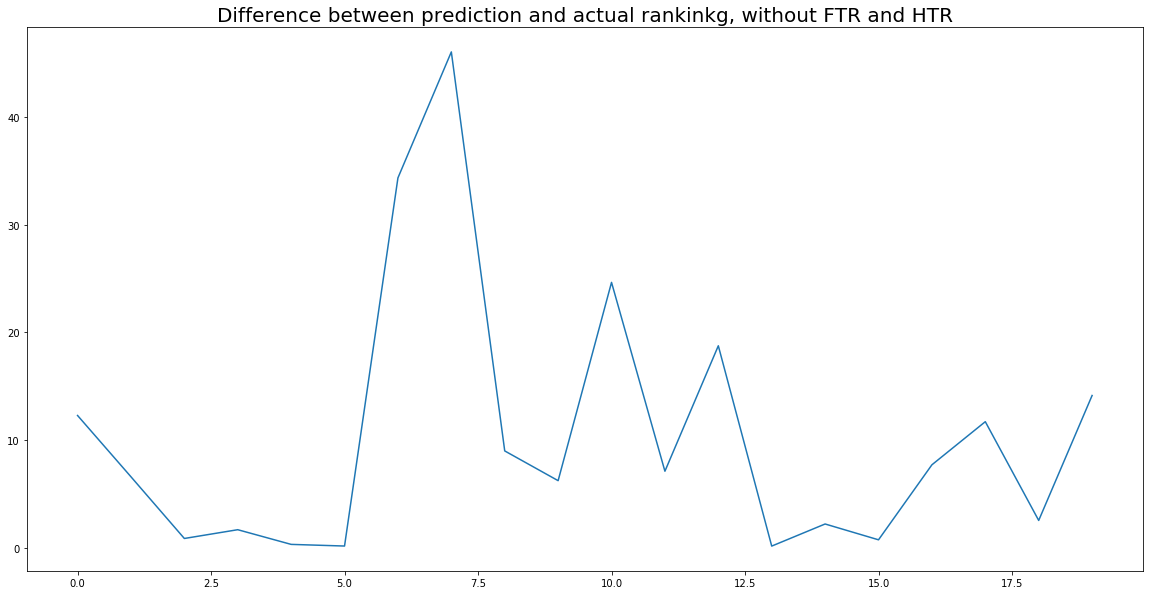

In [79]:
plt.figure(figsize=(20,10))
plt.title('Difference between prediction and actual rankinkg, including FTR and HTR', fontsize=20)
meanSquaredRegular = [(comparisionRealPredicted.iloc[i,1] - comparisionRealPredicted.iloc[i,2])**2  \
          for i in range(len(rank1617))]

plt.plot(meanSquaredRegular)
print(sum(meanSquaredRegular))
print("The global mean square error including FTR and HTR is ", sum(meanSquaredRegular)/len(meanSquaredWithout))

plt.figure(figsize=(20,10))
plt.title('Difference between prediction and actual rankinkg, without FTR and HTR', fontsize=20)
meanSquaredWithout = [(comparisionRealPredictedWithout.iloc[i,1] - comparisionRealPredictedWithout.iloc[i,2])**2  \
          for i in range(len(rank1617))]

plt.plot(meanSquaredWithout)
print("The global mean square error withtout FTR and HTR is ", sum(meanSquaredWithout)/len(meanSquaredWithout))

## Part 5 : Apply the model to other league

<div class="alert alert-info">

One interesting thing could be to see if our model could be suitable for other league (like in Spain / France)
At first sight, we could say that our parameters are somehow 'universal' ; intuitively, a team with a high percentage of shot on targets, or a team who scores a lot tend to have a high rankink, not matter which league its in.

However, we could not deny the differences between leagues : French teams tend to be more defensive, compared to English teams for instance
</div>

In [80]:
fr_1718 = pd.read_csv(base_folder + 'fr_2017_2018.csv')

listTeamsfr1718 = fr_1718.HomeTeam.unique()

rankfr1718 = rankingLeague(listTeamsfr1718, fr_1718)
rankTeamfr1718 = [rankfr1718[i][0] for i in range(len(rankfr1718))]

teamsAvgfr1718 = dataAllTeams(rankTeamfr1718, fr_1718)

C:\Users\Sofiane\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [81]:
teamsAvgfr1718

,Against,C,F,FTR,HTG,HTR,R,S,ST,Scored,Y,TeamName,Rank
,0.741667,6.435417,11.035417,1.781250,1.472917,1.839583,0.191667,16.850000,7.087500,3.127083,1.985417,Paris SG,1
,1.250000,5.198529,13.290441,1.825368,1.238971,1.619485,0.029412,12.549632,4.751838,2.352941,1.924632,Monaco,2
,1.088235,4.751838,12.413603,1.382353,1.117647,1.318015,0.060662,14.759191,5.895221,2.172794,1.863971,Lyon,3
,1.205882,6.202206,13.443015,1.382353,0.847426,1.433824,0.060662,16.077206,5.913603,2.034926,2.329044,Marseille,4
,1.211397,5.737132,13.079044,1.244485,0.450368,1.301471,0.119485,12.676471,4.130515,1.264706,1.847426,Rennes,5
,1.365809,5.334559,11.658088,1.512868,0.568015,1.454044,0.121324,12.465074,4.773897,1.330882,2.343750,Nice,6
,1.084559,4.678309,12.968750,1.455882,0.483456,1.367647,0.150735,13.439338,3.704044,0.965074,1.805147,Nantes,7
,1.299632,4.648897,14.121324,1.663603,0.700368,1.643382,0.062500,12.064338,3.832721,1.183824,2.088235,Bordeaux,8
,1.365809,4.781250,14.181985,1.575368,0.494485,1.571691,0.242647,10.803309,3.981618,1.161765,1.996324,St Etienne,9
,1.832721,3.981618,12.970588,1.908088,0.669118,1.544118,0.152574,11.551471,4.161765,1.404412,1.968750,Dijon,10


<div class="alert alert-info">

We can apply our Ridge Linear Regression function

</div>

In [82]:
y = teamAvg.Rank
teamAvgModel = teamAvg.drop(['Rank', 'TeamName'], axis=1)
teamsAvgfr1718Model = teamsAvgfr1718.drop(['Rank', 'TeamName'], axis=1)



actualFr = teamsAvgfr1718.iloc[:,-1:]
actualFr.index = list(range(len(actualFr)))


ridge2 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge2.fit(teamAvgModel, y)
    
predictionFrance = ridge2.predict(teamsAvgfr1718Model)

teamRankPredictionFrance = pd.DataFrame()
teamRankPredictionFrance["Team Name"] = [rankTeamfr1718[i] for i in range(len(rankTeamfr1718))]
teamRankPredictionFrance["Predicted"] = [predictionFrance[i] for i in range(len(predictionFrance))]
comparisionRealPredictedFr = pd.concat((teamRankPredictionFrance, actualFr), axis=1)
comparisionRealPredictedFr.rename(columns={'Y': 'Actual'}, inplace=True)

In [83]:
comparisionRealPredictedFr

,Team Name,Predicted,Rank
0,Paris SG,-4.579787,1
1,Monaco,5.159393,2
2,Lyon,3.413301,3
3,Marseille,3.170375,4
4,Rennes,9.050864,5
5,Nice,10.221957,6
6,Nantes,9.122709,7
7,Bordeaux,10.608570,8
8,St Etienne,10.766602,9
9,Dijon,12.665963,10


<div class="alert alert-success">

We can see that applying the Premiere League Model to the "Ligue 1" could be correct, to some extent. However, there is an high uncertainty after the 4th place, which could mean 2 things : The French League is very unpredictible or our model is flawed. We could train a model based on the French league history results to compare.
</div>

## Summary

We explored a little bit about the English Premiere League, and the Linear Regression Model. This notebook will be completed, when new ideas will come